In [1]:
### Importing important libraries ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the Dataset

In [2]:
net_df = pd.read_csv('netflix_titles_2021.csv')

In [3]:
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
net_df.shape

(8807, 12)

In [5]:
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Data Cleaning

In [6]:
### Handling Missing values ###

net_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
net_df.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

### Handling Missing values in 'director' feature

In [8]:
# replacing NaN with 'unknown' in director columns
net_df['director'] = net_df['director'].fillna('unknown')
net_df['director'].isnull().sum()

0

### Handling Missing values in 'cast' feature


In [9]:
# replacing NaN with 'unknown' in director columns
net_df['cast'] = net_df['cast'].fillna('unknown')
net_df['cast'].isnull().sum()

0

### Handling Missing values in 'Counrty' feature


In [10]:
# replacing NaN with 'unknown' in director columns
net_df['country'] = net_df['country'].fillna('unknown')
net_df['country'].isnull().sum()

0

In [11]:
net_df.dropna(inplace = True)
net_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Standardizing

In [12]:
net_df['country'] = net_df['country'].apply(lambda x : x.capitalize())
net_df.country.head()

0    United states
1     South africa
2          Unknown
3          Unknown
4            India
Name: country, dtype: object

In [13]:
# converting date_added to month and year
net_df['added_month'] = net_df['date_added'].apply(lambda x:x.split(',')[0].split()[0])
net_df['added_year'] = net_df['date_added'].apply(lambda x:x.split(',')[1])
net_df[['added_month','added_year']]

,added_month,added_year
0,September,2021
1,September,2021
2,September,2021
3,September,2021
4,September,2021
...,...,...
8802,November,2019
8803,July,2019
8804,November,2019
8805,January,2020


In [14]:
# droping column 'date_added'
net_df.drop('date_added',axis=1,inplace= True)

In [15]:
net_df['added_year'] = net_df['added_year'].astype(int)

In [16]:
net_df[net_df['added_year']<net_df['release_year']]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_year
1551,s1552,TV Show,Hilda,unknown,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United kingdom, canada, united states",2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",December,2020
1696,s1697,TV Show,Polly Pocket,unknown,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, united states, ireland",2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...,November,2020
2920,s2921,TV Show,Love Is Blind,unknown,"Nick Lachey, Vanessa Lachey",United states,2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...,February,2020
3168,s3169,TV Show,Fuller House,unknown,"Candace Cameron Bure, Jodie Sweetin, Andrea Ba...",United states,2020,TV-PG,5 Seasons,TV Comedies,The Tanner family’s adventures continue as DJ ...,December,2019
3287,s3288,TV Show,Maradona in Mexico,unknown,Diego Armando Maradona,"Argentina, united states, mexico",2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon...",November,2019
3369,s3370,TV Show,BoJack Horseman,unknown,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United states,2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...,October,2019
3433,s3434,TV Show,The Hook Up Plan,unknown,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her...",October,2019
4844,s4845,TV Show,Unbreakable Kimmy Schmidt,unknown,"Ellie Kemper, Jane Krakowski, Tituss Burgess, ...",United states,2019,TV-14,4 Seasons,TV Comedies,When a woman is rescued from a doomsday cult a...,May,2018
4845,s4846,TV Show,Arrested Development,unknown,"Jason Bateman, Portia de Rossi, Will Arnett, M...",United states,2019,TV-MA,5 Seasons,TV Comedies,It's the Emmy-winning story of a wealthy famil...,May,2018
5394,s5395,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,2018,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,July,2017


In [17]:
# date_added_year can't we less than release year,so droping those rows.
net_df.drop(net_df[net_df['added_year']<net_df['release_year']].index,inplace = True)

In [18]:
net_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United states,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


### Univariate Analysis

In [19]:
net_df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [21]:
net_df['type'].value_counts(normalize = True)

Movie      0.697812
TV Show    0.302188
Name: type, dtype: float64

<AxesSubplot:>

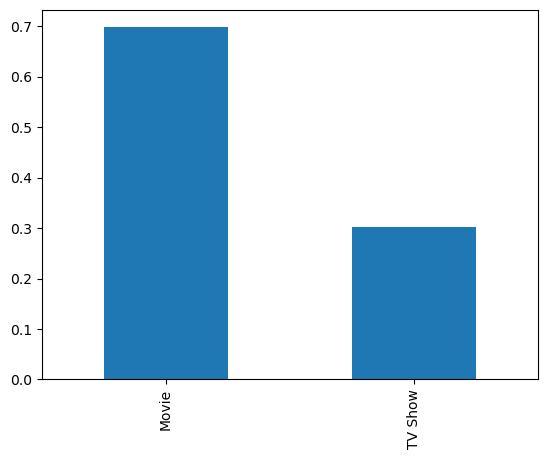

In [23]:
net_df['type'].value_counts(normalize = True).plot.bar()

In [24]:
net_df['director'].unique()

array(['Kirsten Johnson', 'unknown', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [25]:
net_df['director'].value_counts()

unknown                           2610
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Marcus Raboy                        16
Suhas Kadav                         16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4524, dtype: int64

In [26]:
net_df['country'].unique()

array(['United states', 'South africa', 'Unknown', 'India',
       'United states, ghana, burkina faso, united kingdom, germany, ethiopia',
       'United kingdom', 'Germany, czech republic', 'Mexico', 'Turkey',
       'Australia', 'United states, india, france', 'Finland',
       'China, canada, united states',
       'South africa, united states, japan', 'Nigeria', 'Japan',
       'Spain, united states', 'France', 'Belgium',
       'United kingdom, united states', 'United states, united kingdom',
       'France, united states', 'South korea', 'Spain',
       'United states, singapore', 'United kingdom, australia, france',
       'United kingdom, australia, france, united states',
       'United states, canada', 'Germany, united states',
       'South africa, united states', 'United states, mexico',
       'United states, italy, france, japan',
       'United states, italy, romania, united kingdom',
       'Australia, united states', 'Argentina, venezuela',
       'United states, unit

In [28]:
net_df['country'].value_counts(normalize = True)[:5]

United states     0.319394
India             0.110757
Unknown           0.094462
United kingdom    0.047630
Japan             0.027689
Name: country, dtype: float64

<AxesSubplot:>

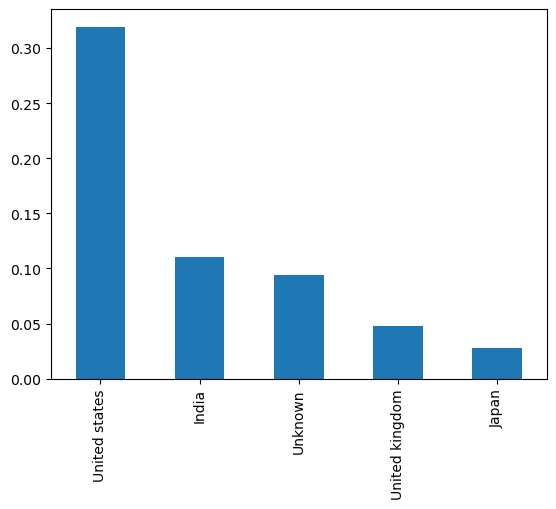

In [29]:
net_df['country'].value_counts(normalize=True)[:5].plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='added_year', ylabel='Density'>

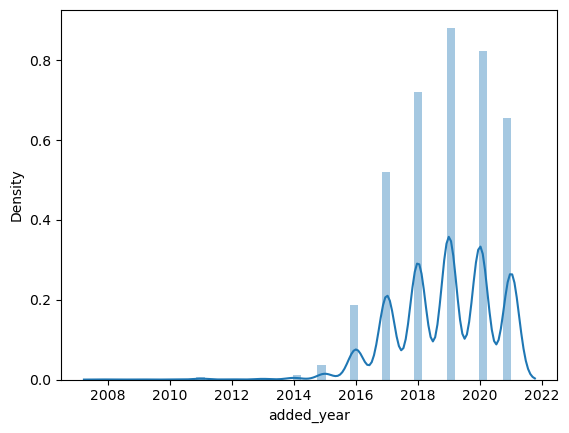

In [30]:
sns.distplot(net_df['added_year'])

<AxesSubplot:xlabel='added_year', ylabel='count'>

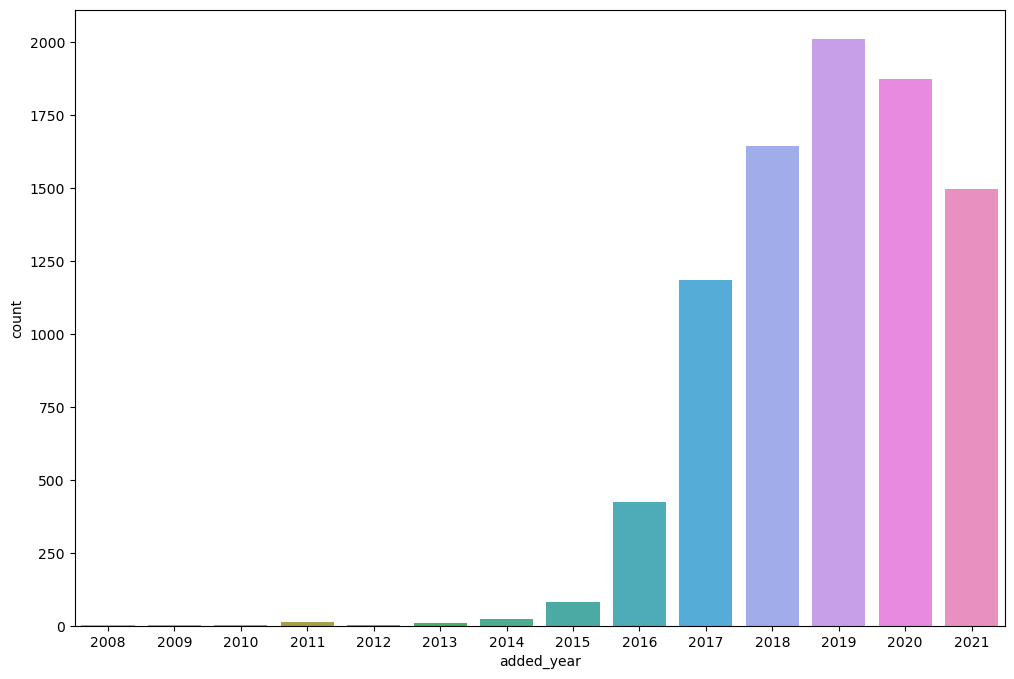

In [31]:
plt.figure(figsize = (12,8))
sns.countplot(x = net_df['added_year'])

<AxesSubplot:>

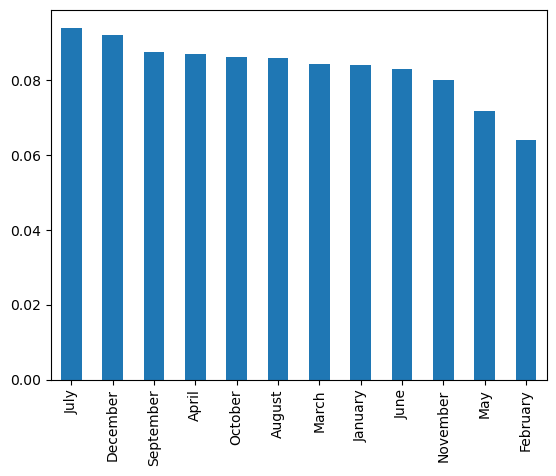

In [32]:
net_df['added_month'].value_counts(normalize = True).plot.bar()

<AxesSubplot:>

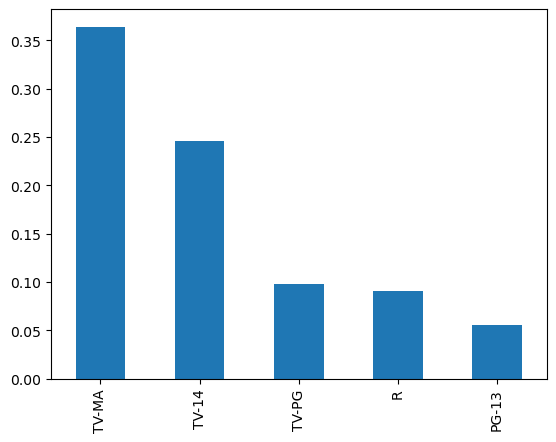

In [33]:
net_df.rating.value_counts(normalize = True)[:5].plot.bar()

In [34]:
genre_list = net_df['listed_in'].str.split(',')

In [35]:
net_df['genre_1'] = genre_list.str.get(0)
net_df['genre_2'] = genre_list.str.get(1)
net_df['genre_3'] = genre_list.str.get(2)

In [36]:
net_df.drop('listed_in',axis =1,inplace =True)

In [37]:
net_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,description,added_month,added_year,genre_1,genre_2,genre_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United states,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September,2021,Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South africa,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,2021,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,September,2021,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,Unknown,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",September,2021,Docuseries,Reality TV,NaN
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,September,2021,International TV Shows,Romantic TV Shows,TV Comedies


<AxesSubplot:>

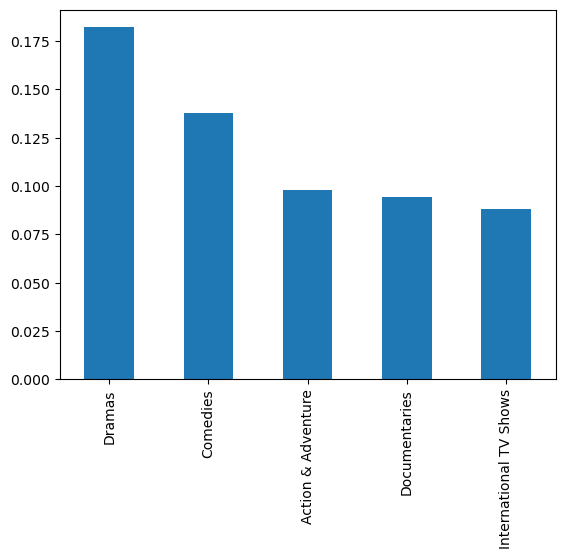

In [38]:
net_df['genre_1'].value_counts(normalize=True)[:5].plot.bar()

### Bivariate Analysis

In [40]:
temp_df = net_df[net_df['country'].isin(net_df['country'].value_counts()[:5].index)]

<AxesSubplot:xlabel='country', ylabel='count'>

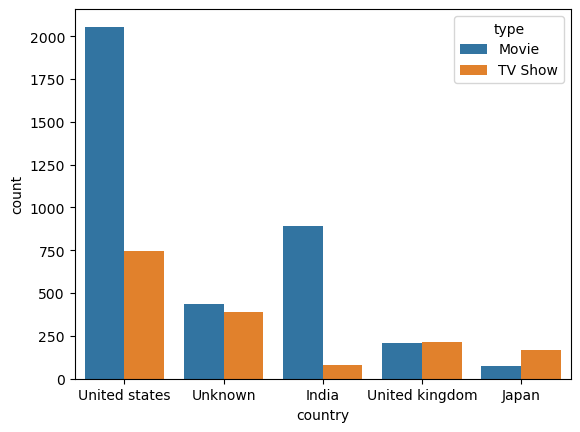

In [41]:
sns.countplot(data=temp_df,x='country',hue='type')

In [42]:
list(net_df['country'].value_counts()[:5].index)

['United states', 'India', 'Unknown', 'United kingdom', 'Japan']

<AxesSubplot:xlabel='country', ylabel='count'>

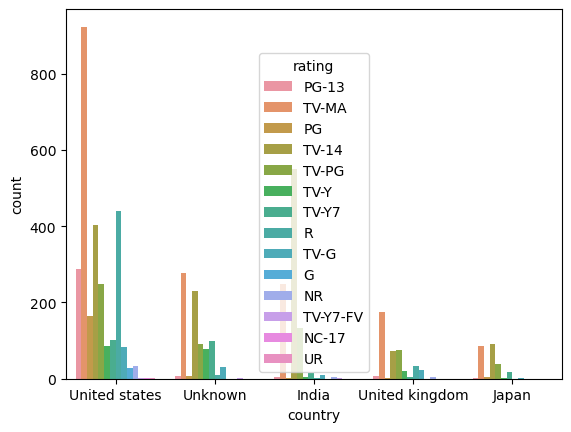

In [43]:
sns.countplot(data=temp_df,x='country',hue='rating')

<AxesSubplot:xlabel='country', ylabel='count'>

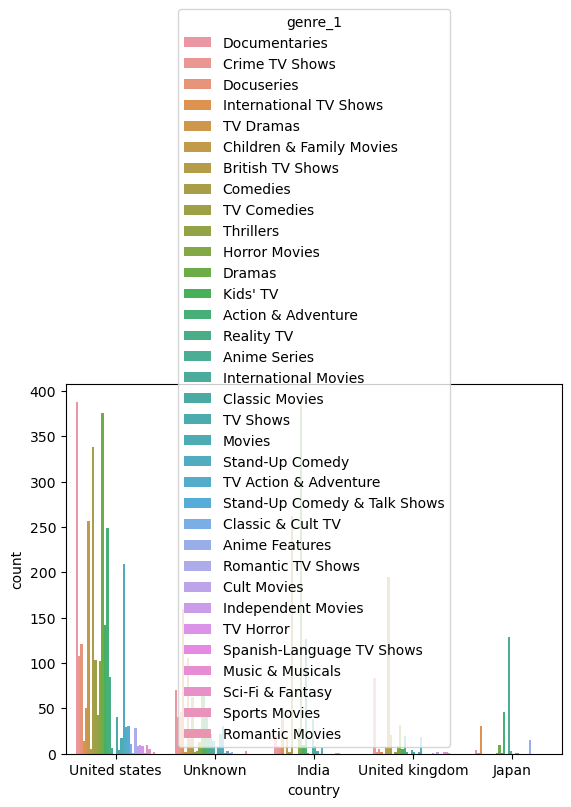

In [44]:
sns.countplot(data=temp_df,x='country',hue='genre_1')